In [1]:
import tensorflow as tf
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models

In [2]:
# Set up directories
base_dir = '/kaggle/input/chessman-image-dataset/Chessman-image-dataset/Chess'
train_dir = base_dir
validation_split = 0.2

In [3]:
# Set up data generators
img_size = (224, 224)
batch_size = 32


In [4]:

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=validation_split
)

In [5]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)


Found 442 images belonging to 6 classes.


In [6]:
validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)


Found 109 images belonging to 6 classes.


In [7]:

# Load pre-trained EfficientNet model
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))


16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [8]:

# Load pre-trained EfficientNet model
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))


In [9]:

# Add custom classification layers
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(6, activation='softmax')  # 6 classes for chess pieces
])


In [10]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ efficientnetb0 (Functional)     │ ?                      │     4,049,571 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ ?                      │   0 (unbuilt) │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,049,571 (15.45 MB)

 Trainable params: 4,007,548 (15.29 MB)

 Non-trainable params: 42,023 (164.16 KB)

In [11]:

# Compile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [12]:
# Train the model
epochs = 20
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    epochs=epochs
)

Epoch 1/20


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1727103460.833581     146 service.cc:145] XLA service 0x7984280038a0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1727103460.833665     146 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1727103460.833674     146 service.cc:153]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1727103515.078685     146 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


13/13 ━━━━━━━━━━━━━━━━━━━━ 164s 6s/step - accuracy: 0.2112 - loss: 1.7929 - val_accuracy: 0.1458 - val_loss: 1.9265
Epoch 2/20
 1/13 ━━━━━━━━━━━━━━━━━━━━ 2s 175ms/step - accuracy: 0.5938 - loss: 1.2374

/opt/conda/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 449ms/step - accuracy: 0.5938 - loss: 1.2374 - val_accuracy: 0.0769 - val_loss: 1.8869
Epoch 3/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 21s 540ms/step - accuracy: 0.6314 - loss: 0.9607 - val_accuracy: 0.1354 - val_loss: 2.2104
Epoch 4/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7500 - loss: 0.5938 - val_accuracy: 0.1538 - val_loss: 2.4942
Epoch 5/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 11s 587ms/step - accuracy: 0.7892 - loss: 0.5453 - val_accuracy: 0.1458 - val_loss: 2.6226
Epoch 6/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7812 - loss: 0.4816 - val_accuracy: 0.0769 - val_loss: 2.4263
Epoch 7/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 11s 530ms/step - accuracy: 0.8522 - loss: 0.4530 - val_accuracy: 0.1458 - val_loss: 2.7394
Epoch 8/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6875 - loss: 0.6126 - val_accuracy: 0.0769 - val_loss: 3.1502
Epoch 9/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 11s 566ms/step - accuracy: 0.8576 - loss: 0.3706 - val_accuracy: 0.1458 - val_

In [13]:
# Fine-tuning (optional)
# Unfreeze some layers of the base model
base_model.trainable = True
for layer in base_model.layers[:-20]:
    layer.trainable = False


In [14]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ efficientnetb0 (Functional)     │ (None, 7, 7, 1280)     │     4,049,571 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 6)              │           774 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,558,895 (47.91 MB)

 Trainable params: 1,515,702 (5.78 MB)

 Non-trainable params: 2,698,611 (10.29 MB)

 Optimizer params: 8,344,582 (31.83 MB)

In [15]:

# Recompile the model
model.compile(
    optimizer=tf.keras.optimizers.Adam(1e-5),  # Lower learning rate
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [16]:
# Continue training
history_fine = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    epochs=10
)

Epoch 1/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 71s 3s/step - accuracy: 0.1778 - loss: 2.4050 - val_accuracy: 0.1354 - val_loss: 2.6259
Epoch 2/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 198ms/step - accuracy: 0.1875 - loss: 2.3368 - val_accuracy: 0.1538 - val_loss: 2.4192
Epoch 3/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 10s 452ms/step - accuracy: 0.1699 - loss: 2.3707 - val_accuracy: 0.1458 - val_loss: 2.6965
Epoch 4/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step - accuracy: 0.2500 - loss: 1.9411 - val_accuracy: 0.0769 - val_loss: 2.8380
Epoch 5/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 11s 550ms/step - accuracy: 0.1972 - loss: 2.1301 - val_accuracy: 0.1354 - val_loss: 2.7891
Epoch 6/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.2188 - loss: 2.1770 - val_accuracy: 0.1538 - val_loss: 2.9371
Epoch 7/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 11s 518ms/step - accuracy: 0.1860 - loss: 2.0678 - val_accuracy: 0.1250 - val_loss: 2.8856
Epoch 8/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.1562 - loss: 2.4178 - val_accuracy: 0.23

In [18]:
# Save the model
model.save('chess_piece_classifier.h5')



In [19]:
import matplotlib.pyplot as plt
import numpy as np
import os

In [20]:
# Testing and Visualization
def load_and_preprocess_image(img_path):
    img = tf.keras.preprocessing.image.load_img(img_path, target_size=(224, 224))
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)
    return img_array / 255.0



In [21]:
def predict_and_plot(model, img_path, class_names):
    img_array = load_and_preprocess_image(img_path)
    predictions = model.predict(img_array)
    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = np.max(predictions[0])
    
    plt.figure(figsize=(8, 8))
    plt.imshow(plt.imread(img_path))
    plt.title(f"Predicted: {predicted_class} (Confidence: {confidence:.2f})")
    plt.axis('off')
    plt.show()
    
    print("Class probabilities:")
    for i, (class_name, prob) in enumerate(zip(class_names, predictions[0])):
        print(f"{class_name}: {prob:.4f}")



In [22]:
# Load the saved model
loaded_model = tf.keras.models.load_model('chess_piece_classifier.h5')


In [23]:

# Get class names
class_names = list(train_generator.class_indices.keys())



In [24]:
# Test directory
test_dir = '/kaggle/input/chessman-image-dataset/Chessman-image-dataset/Chess'


1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step


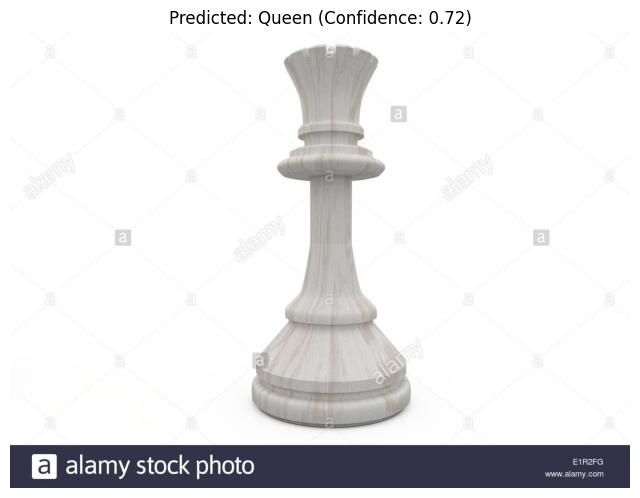

Class probabilities:
Bishop: 0.0439
King: 0.1397
Knight: 0.0158
Pawn: 0.0159
Queen: 0.7167
Rook: 0.0680
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


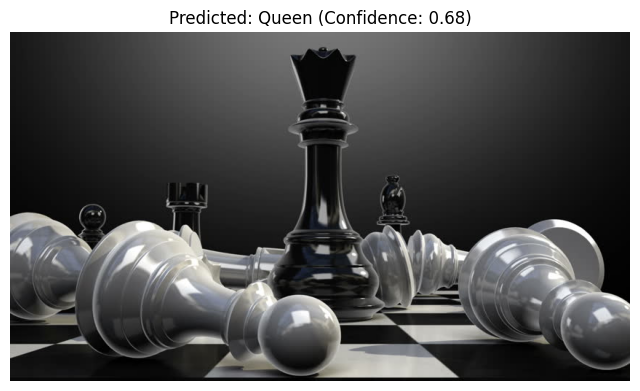

Class probabilities:
Bishop: 0.0454
King: 0.1741
Knight: 0.0178
Pawn: 0.0161
Queen: 0.6787
Rook: 0.0680
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


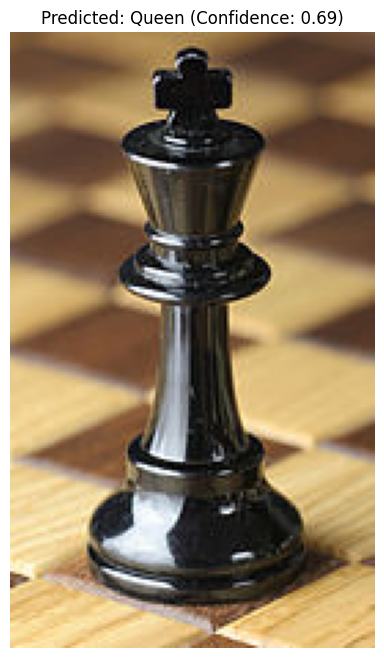

Class probabilities:
Bishop: 0.0437
King: 0.1684
Knight: 0.0152
Pawn: 0.0145
Queen: 0.6907
Rook: 0.0675
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


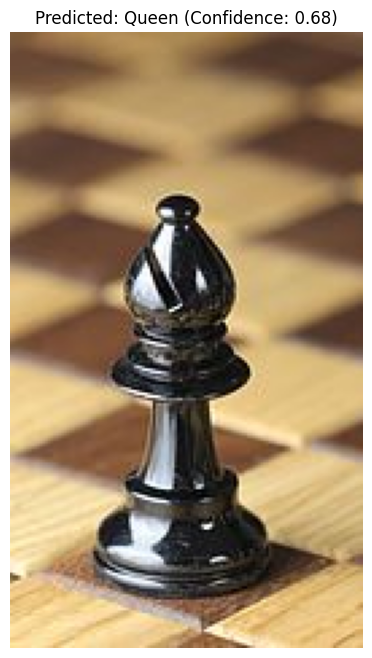

Class probabilities:
Bishop: 0.0437
King: 0.1757
Knight: 0.0157
Pawn: 0.0144
Queen: 0.6837
Rook: 0.0668
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


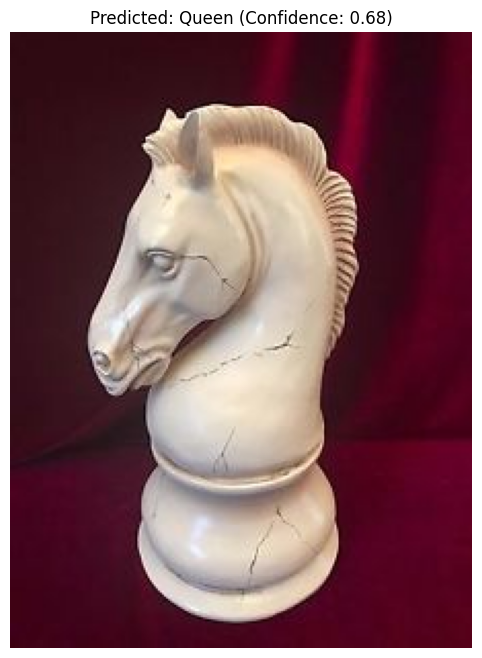

Class probabilities:
Bishop: 0.0460
King: 0.1744
Knight: 0.0174
Pawn: 0.0157
Queen: 0.6793
Rook: 0.0672
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


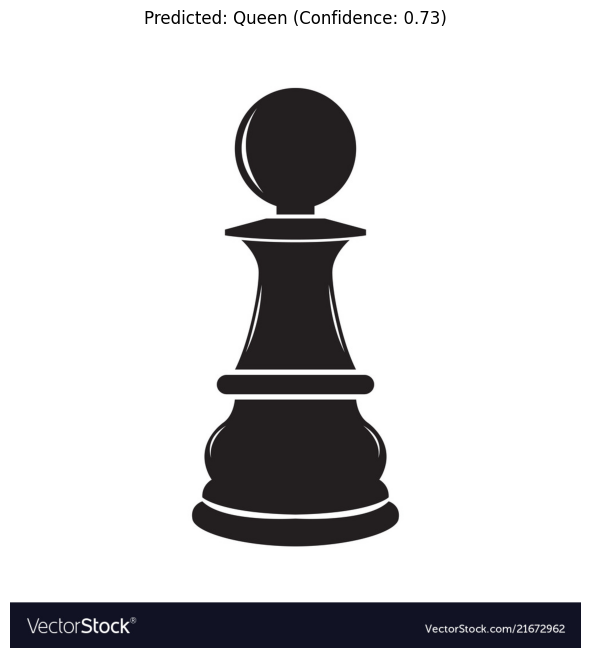

Class probabilities:
Bishop: 0.0444
King: 0.1315
Knight: 0.0133
Pawn: 0.0134
Queen: 0.7323
Rook: 0.0651


In [25]:

# Test on a few images
test_images = [
    os.path.join(test_dir, 'Rook', '00000032.jpg'),
    os.path.join(test_dir, 'Queen', '00000025.jpg'),
    os.path.join(test_dir, 'King', '00000006.JPG'),
    os.path.join(test_dir, 'Bishop', '00000000.JPG'),
    os.path.join(test_dir, 'Knight', '00000013.jpg'),
    os.path.join(test_dir, 'Pawn', '00000005.jpg')
]

for img_path in test_images:
    predict_and_plot(loaded_model, img_path, class_names)


In [26]:

# Evaluate on the validation set
evaluation = loaded_model.evaluate(validation_generator)
print(f"Validation Loss: {evaluation[0]:.4f}")
print(f"Validation Accuracy: {evaluation[1]:.4f}")



4/4 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.1415 - loss: 2.8887 
Validation Loss: 2.8667
Validation Accuracy: 0.1376


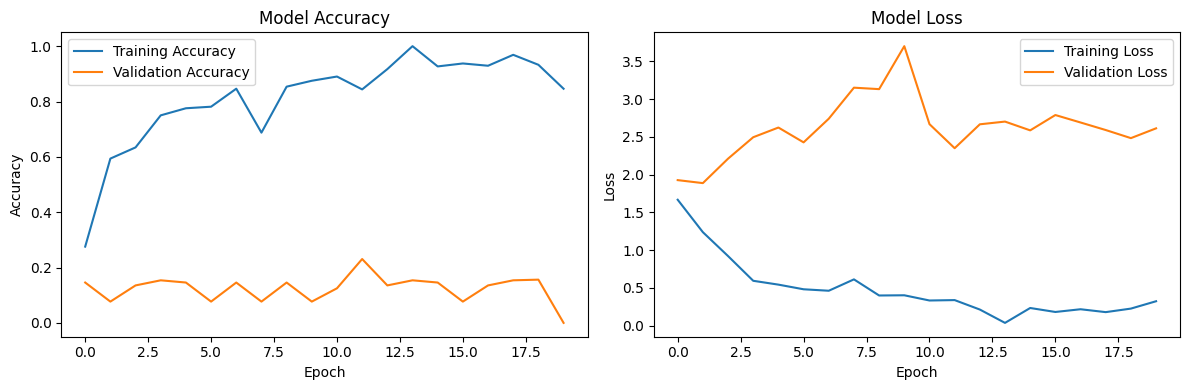

In [27]:
# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()



In [28]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns



In [29]:
# Get predictions
Y_pred = loaded_model.predict(validation_generator)
y_pred = np.argmax(Y_pred, axis=1)
y_true = validation_generator.classes



4/4 ━━━━━━━━━━━━━━━━━━━━ 12s 2s/step 


In [30]:
# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)



### Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()